<a href="https://colab.research.google.com/github/mityasereda/Report-Forecasting/blob/main/ReportForecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
data = pd.DataFrame()
folder = '/content/drive/MyDrive/Report Forecasting/Oil Predict/oil_gas_train'
for file in os.listdir(folder):
  df = pd.read_excel(folder + '/' + file, skiprows=27)
  df = df.iloc[:, 8:].rename(columns = {'Unnamed: 8' : 'Parameter'}).T
  df.columns = df.iloc[0]
  df = df.iloc[1:, df.columns.notna()]
  df.dropna(axis = 1, how = 'all', inplace = True)
  df.drop(['Ratios', 'Valuation', 'CHANGES TO SHAREHOLDER EQUITY', 'CASH FLOW STATEMENT', \
'BALANCE SHEET', 'INCOME STATEMENT'], axis = 1, inplace = True)
  df['Company'] = file.rstrip('.xlsx')
  df.reset_index(inplace = True)
  df.columns = pd.io.parsers.base_parser.ParserBase({'names':df.columns, 'usecols':None})._maybe_dedup_names(df.columns)
  for column in df.columns:
    if column not in data.columns:
      data[column] = None
  for column in data.columns:
    if column not in df.columns:
      df[column] = None
  data = data.append(df)
data.rename(columns = {'index' : 'Date'}, inplace=True)
data.reset_index(drop = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  app.launch_new_instance()


,Date,Revenue,Consensus:,% Surprise | % Est. vs Consensus,Revenue Growth (YoY),Cost of Revenue,Gross Profit,Gross margin,Other Operating Income,Operating Expenses,...,CAPEX / EBITDA,FCF / DEBT,Gross Leverage (Total Debt / EBITDA),Net Leverage (Net Debt / EBITDA),Total Liabilities / Tangible Assets,Cash + AR / Total Assets,Cash % of Revenue,Company,Div Ex date:,Dividends Per Share (fwd only)
0,Q1 '11 A,21.436696,0,0,NaN,-11.001468,10.435228,0.486793,0,-3.816937,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BCEI,None,None
1,Q2 '11 A,24.89236,0,0,NaN,-11.756303,13.136057,0.527714,0,-4.192664,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BCEI,None,None
2,Q3 '11 A,26.85424,0,0,NaN,-12.785786,14.068454,0.523882,0,-5.539955,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BCEI,None,None
3,Q4 '11 A,34.444,0,0,NaN,-15.753,18.691,0.542649,0,-10.948,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BCEI,None,None
4,Q1 '12 A,46.619292,0,0,1.174742,-18.108374,28.510918,0.611569,0,-10.75065,...,1.169401,-0.783113,0.270259,0.270259,0.259115,0.052533,0,BCEI,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2051,Q2 '19 A,236.26,0,0,-0.201414,-172.41,63.85,0.270253,0,-44.027,...,3.504594,-0.089272,2.653758,2.593956,0.549938,0.037052,0.032541,╨Ъ╨╜╨╕╨│╨░8,None,None
2052,Q3 '19 A,176.942,0,0,-0.452478,-154.608,22.334,0.126222,0,-40.69,...,0.971638,0.020965,3.434923,3.315563,0.538196,0.041221,0.060308,╨Ъ╨╜╨╕╨│╨░8,None,None
2053,Q4 '19 A,230.844,0,0,-0.259581,-246.974,-16.13,-0.069874,0,-71.334,...,3.270434,-0.073757,2.940712,2.880834,0.766182,0.057908,0.03549,╨Ъ╨╜╨╕╨│╨░8,None,None
2054,Q1 '20 A,165.187008,0,0,-0.288741,-142.680992,22.506016,0.136246,0,-179.586,...,-1.652038,0.008345,7.096037,6.952897,0.843584,0.044655,0.037845,╨Ъ╨╜╨╕╨│╨░8,None,None


In [ ]:
38 - data.groupby('Company').aggregate('count')

,Date,Revenue,Consensus:,% Surprise | % Est. vs Consensus,Revenue Growth (YoY),Cost of Revenue,Gross Profit,Gross margin,Other Operating Income,Operating Expenses,...,CAPEX / REVENUE,CAPEX / EBITDA,FCF / DEBT,Gross Leverage (Total Debt / EBITDA),Net Leverage (Net Debt / EBITDA),Total Liabilities / Tangible Assets,Cash + AR / Total Assets,Cash % of Revenue,Div Ex date:,Dividends Per Share (fwd only)
Company,,,,,,,,,,,,,,,,,,,,,
AMPY,0,0,0,0,7,0,0,0,0,0,...,4,4,4,4,4,4,4,4,38,38
APA,0,0,0,0,4,0,0,0,0,0,...,4,4,4,4,4,4,4,4,38,38
AR,0,0,0,0,10,0,0,0,0,0,...,4,4,4,4,4,7,4,4,38,38
BATL,0,0,0,0,4,0,0,0,0,0,...,4,4,4,4,4,4,4,4,38,38
BCEI,0,0,0,0,4,0,0,0,0,0,...,4,4,4,4,4,4,4,4,38,38
BRY,0,0,0,0,31,0,0,0,0,0,...,4,4,4,4,4,8,4,4,38,38
BSM,0,0,0,0,19,0,0,0,0,0,...,4,4,4,4,4,8,4,4,38,38
CDEV,0,0,0,0,24,0,0,0,0,0,...,4,4,4,4,4,8,4,4,38,38
CHK,0,0,0,0,4,0,0,0,0,0,...,4,4,4,4,4,4,4,4,38,38


Most of the companies has data for 38 periods. However CRBO has data for 2010 as well, furthermore it is the only company that has information about expected dividends

In [ ]:
(38 - data.query('Company != "CRBO"').groupby('Company').count()).sum().sum()


12330

In [ ]:
(38 - data.query('Company != "CRBO"').drop(['Div Ex date:', 'Dividends Per Share (fwd only)'], axis = 1).groupby('Company').count()).sum().sum()

8302

Total number of Nones equals to 12330 (without 'Div Ex date:', 'Dividends Per Share (fwd only)' 8302)


Let's divide existing companies to 5 groups for more insightful analysis

In [ ]:
clustering = data.groupby('Company')[['Revenue']].mean()
clustering

,Revenue
Company,
AMPY,79.759447
APA,2531.868423
AR,614.141342
BATL,136.569711
BCEI,73.961080
BRY,43.975131
BSM,68.456947
CDEV,70.238948
CHK,3008.684219


In [ ]:
groups = np.array_split(clustering.Revenue.sort_values(), 5)

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41],
           dtype='int64')

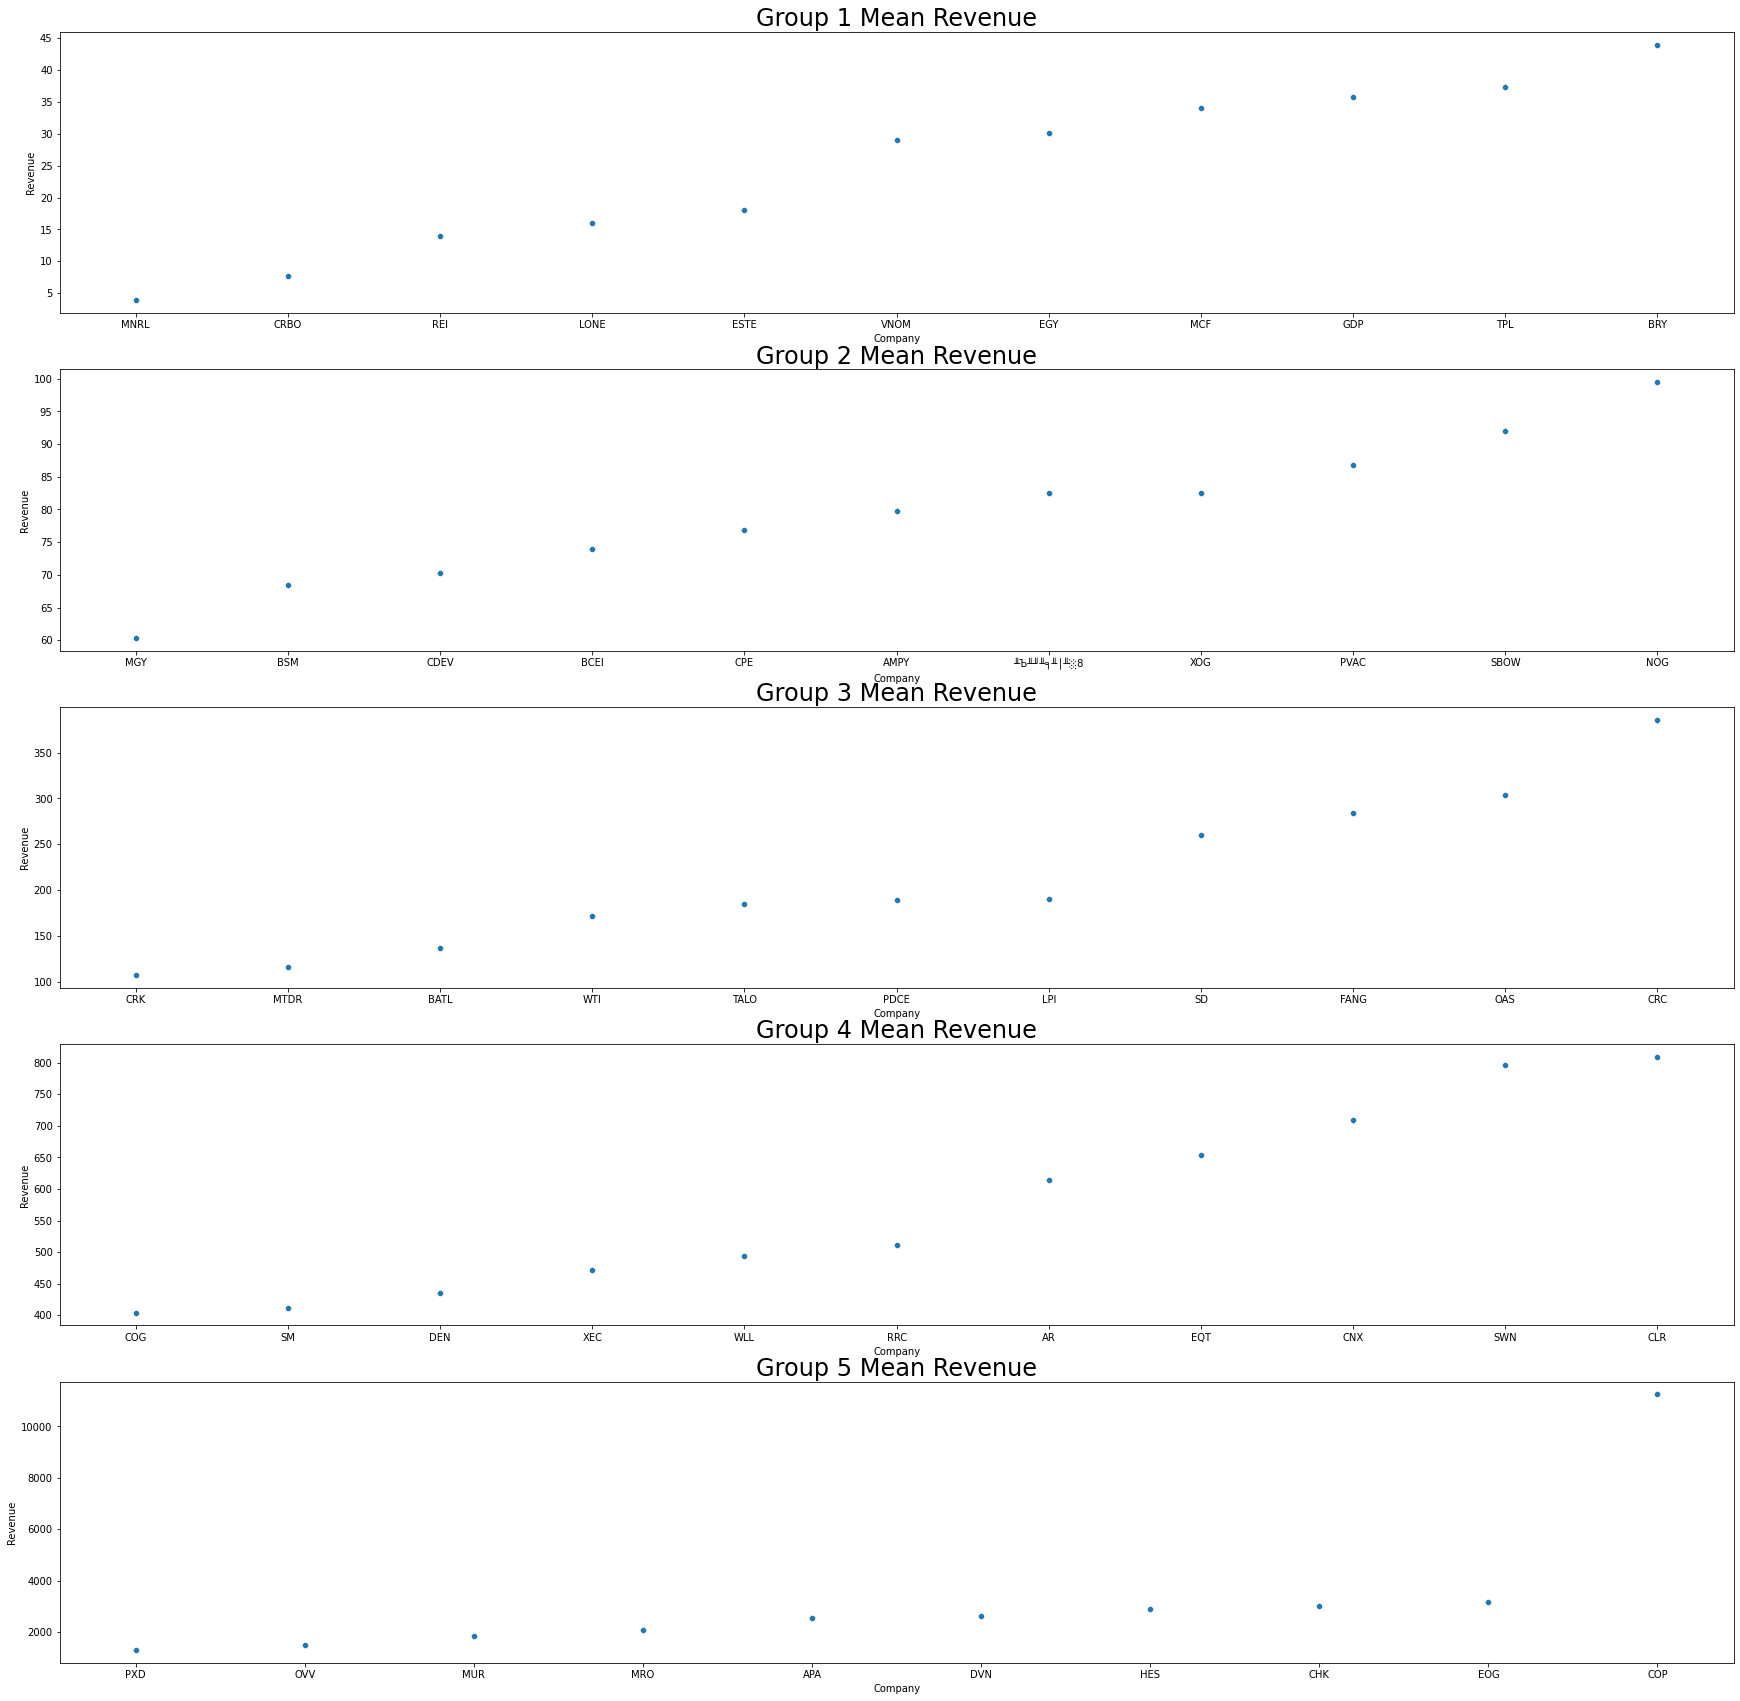

In [ ]:
fig, axes = plt.subplots(len(groups), 1, figsize=(30, 30))
for i in range(len(groups)):
  sns.scatterplot(x = groups[i].index, y = clustering.loc[list(groups[i].index)].Revenue, \
  ax = axes[i]).set_title('Group {} Mean Revenue'.format(i+1), fontdict = {'fontsize': 24})

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


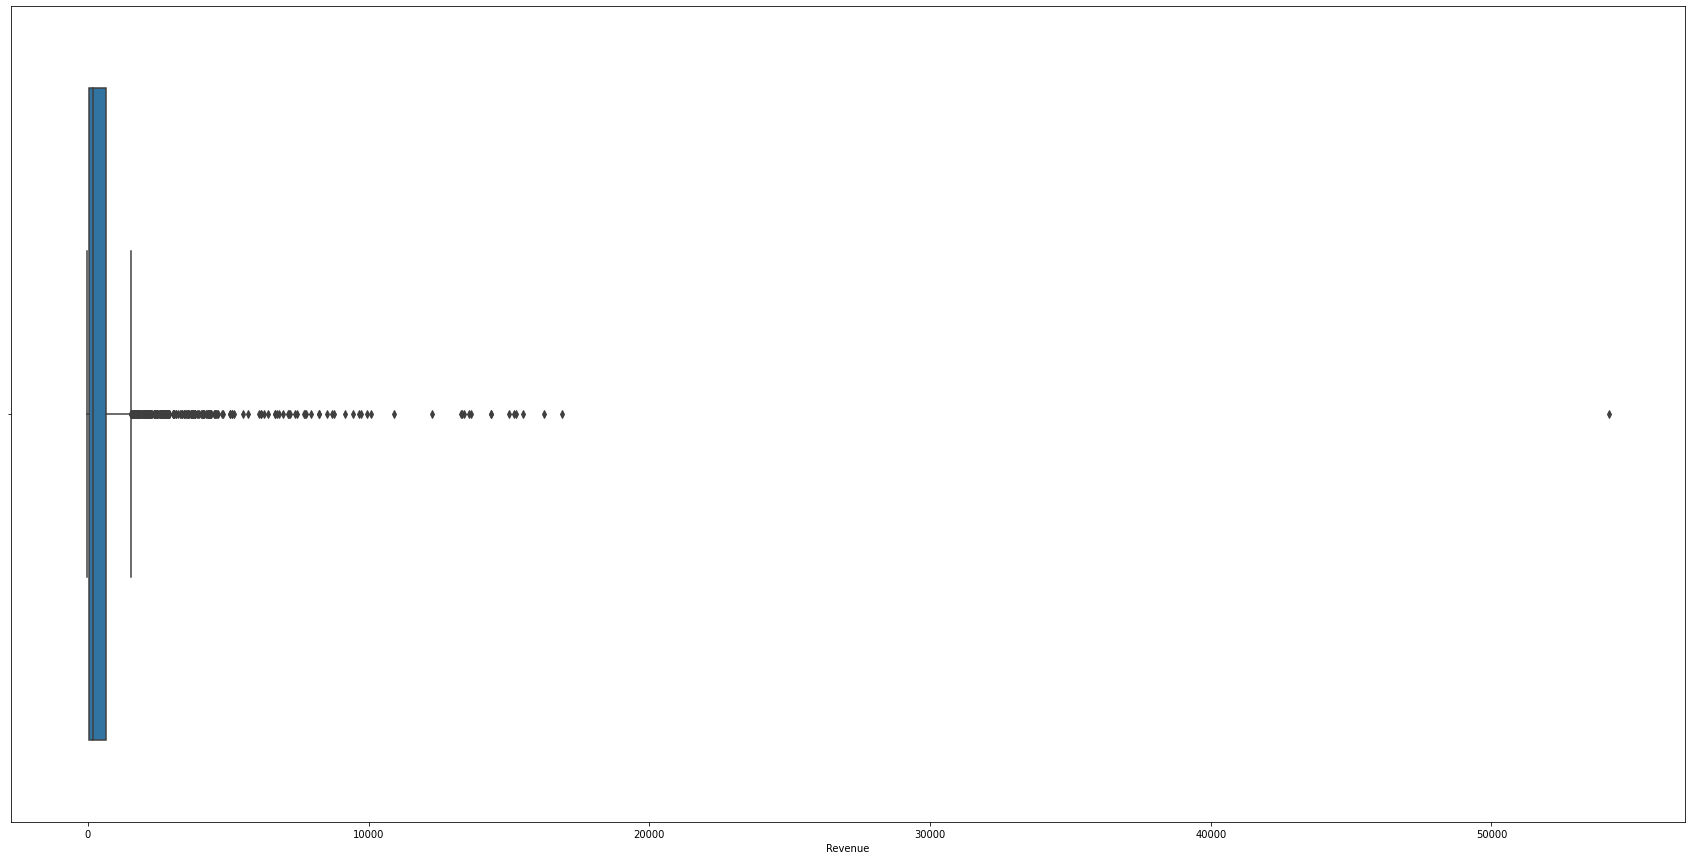

In [ ]:
plt.figure(figsize = (30,15))
sns.boxplot(data.Revenue)

In [ ]:
data.query('Revenue > 50000')

,Date,Revenue,Consensus:,% Surprise | % Est. vs Consensus,Revenue Growth (YoY),Cost of Revenue,Gross Profit,Gross margin,Other Operating Income,Operating Expenses,...,CAPEX / EBITDA,FCF / DEBT,Gross Leverage (Total Debt / EBITDA),Net Leverage (Net Debt / EBITDA),Total Liabilities / Tangible Assets,Cash + AR / Total Assets,Cash % of Revenue,Company,Div Ex date:,Dividends Per Share (fwd only)
0,Q1 '11 A,54174.998528,61716.75,-0.122199,NaN,-48376.999936,5797.998592,0.107024,0,-573,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,COP,None,None


In terms of Revenue we have one enormous observation for COP on Q1 11. Let's look at the boxplot without it

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


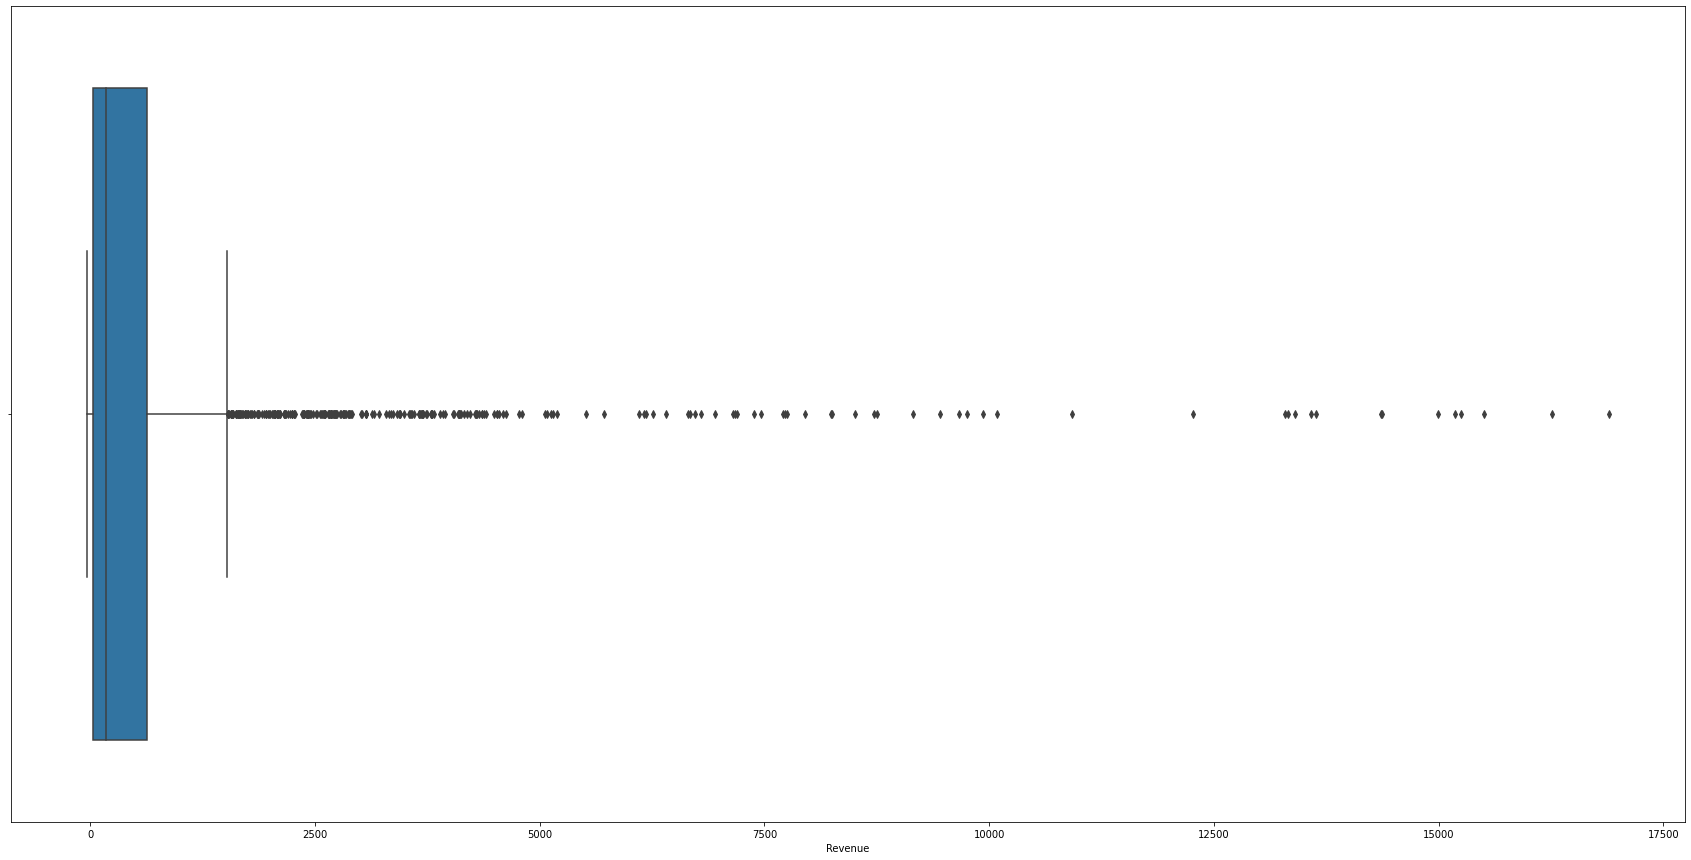

In [ ]:
plt.figure(figsize = (30,15))
sns.boxplot(data.query('Revenue < 50000').Revenue)

This one looks far more pleasant, however we can see that there are groups of companies which earn more than average company in our sample

In [ ]:
import statsmodels.api as sm

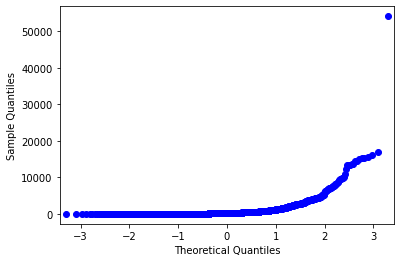

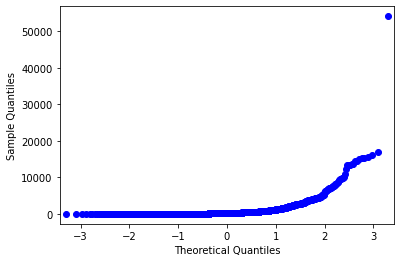

In [ ]:
sm.qqplot(data.Revenue)

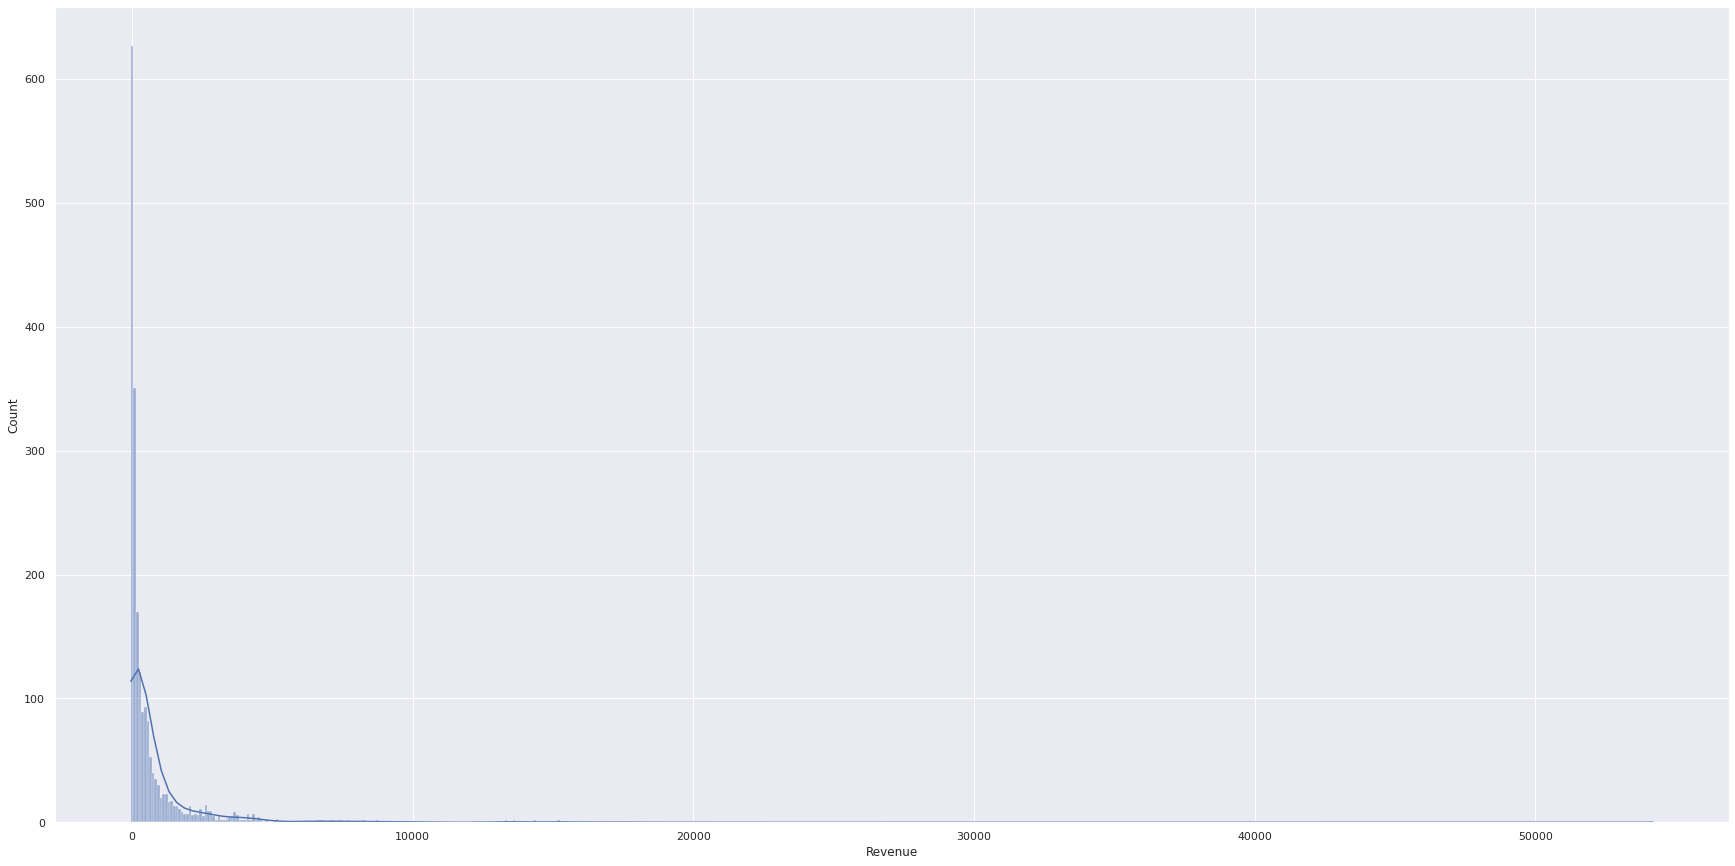

In [ ]:
plt.figure(figsize = (30,15))
sns.histplot(data.Revenue, kde=True)

In [ ]:
import scipy.stats as st

In [ ]:
st.shapiro(data.Revenue)

ShapiroResult(statistic=0.34884148836135864, pvalue=0.0)

It is obvious that Revenue doesn't follow normal distribution. It almost look like F distribution

#Score for the task

I haven't decided on the score parameter yet. However my current thoughts are to use a combination of classic approaches like R^2 or Log-Likelehood
with fine system based on the movements of values (I.e. it's better to predict the direction of the movement correctly but not too precise than to predict closely to the value but with opposite sign)

